<a href="https://colab.research.google.com/github/hazarali/ann-kansertespiti/blob/main/ann_kanser_tespiti.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [41]:
import cv2
from glob import glob
from tensorflow.keras import Input
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import RMSprop
from matplotlib import  pyplot



In [42]:
from google.colab import drive
drive.mount("/content/gdrive")

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [43]:
import math 
import matplotlib.pyplot as plt
import numpy as np

<ipython-input-44-ac98980c4bf8>:2: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  return np.array(x>0, dtype= np.int)


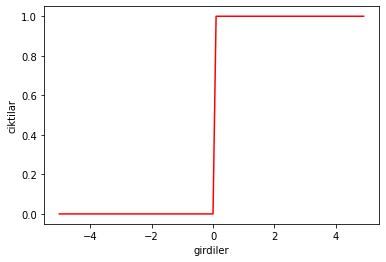

In [44]:
def step(x):
  return np.array(x>0, dtype= np.int)

def sigmoid(x):
  return 1/(1+np.exp(-x))

x=np.arange(-5,5,0.1)
step=step(x)
plt.xlabel("girdiler")
plt.ylabel("ciktilar")
plt.plot(x,step,color="r")
plt.show()



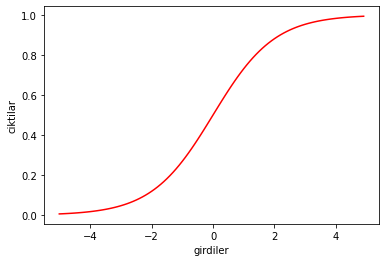

In [45]:
x=np.arange(-5,5,0.1)
sigmoidd=sigmoid(x)
plt.xlabel("girdiler")
plt.ylabel("ciktilar")
plt.plot(x,sigmoidd,color="r")
plt.show()

In [46]:
import pandas as pd
my_Data=pd.read_csv(".../csv_dosyalari/breast_canser_data.csv")

In [47]:
data=my_Data.copy()
data.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


In [48]:
data.drop(["id","Unnamed: 32"],axis=1,inplace=True)
data

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,...,25.380,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890
1,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,...,24.990,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902
2,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,...,23.570,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758
3,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,...,14.910,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300
4,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,...,22.540,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,M,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,...,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115
565,M,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,...,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637
566,M,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,...,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820
567,M,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,...,25.740,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400


In [49]:
data.describe()

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
count,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,0.062798,...,16.269190,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946
std,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,0.007060,...,4.833242,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061
min,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,0.049960,...,7.930000,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040
25%,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,0.057700,...,13.010000,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460
50%,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,0.061540,...,14.970000,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040
75%,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,0.066120,...,18.790000,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080
max,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,0.097440,...,36.040000,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500


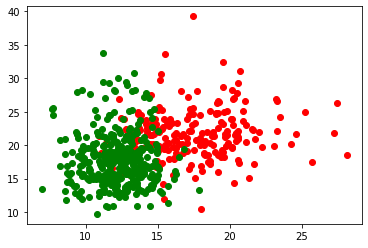

In [50]:
M=data[data.diagnosis=="M"]
B=data[data.diagnosis=="B"]
import matplotlib.pyplot as plt
plt.scatter(M.radius_mean,M.texture_mean,color="red",label="bad")
plt.scatter(B.radius_mean,B.texture_mean,color="green",label="good")


In [51]:
data.diagnosis=[1 if each=="M" else 0 for each in data.diagnosis]

In [52]:
data.diagnosis

0      1
1      1
2      1
3      1
4      1
      ..
564    1
565    1
566    1
567    1
568    0
Name: diagnosis, Length: 569, dtype: int64

In [53]:
x=data.drop(["diagnosis"],axis=1)
y=data.diagnosis.values
from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest=train_test_split(x,y,test_size=0.2,random_state=22)

In [54]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
xtrain=sc.fit_transform(xtrain)
xtest=sc.transform(xtest)

In [55]:
import tensorflow.keras
ann=tensorflow.keras.models.Sequential()
ann.add(tensorflow.keras.layers.Dense(16,activation="relu",input_dim=30))

In [56]:
ann.add(tensorflow.keras.layers.Dense(16,activation="relu"))
ann.add(tensorflow.keras.layers.Dense(1,activation="sigmoid"))

In [57]:
ann.compile(optimizer="adam",loss="binary_crossentropy",metrics=["accuracy"])

In [58]:
ann.fit(xtrain,ytrain,epochs=90)

Epoch 1/90
15/15 [==============================] - 1s 2ms/step - loss: 0.5910 - accuracy: 0.6615
Epoch 2/90
15/15 [==============================] - 0s 2ms/step - loss: 0.4347 - accuracy: 0.8791
Epoch 3/90
15/15 [==============================] - 0s 2ms/step - loss: 0.3306 - accuracy: 0.9297
Epoch 4/90
15/15 [==============================] - 0s 2ms/step - loss: 0.2594 - accuracy: 0.9495
Epoch 5/90
15/15 [==============================] - 0s 3ms/step - loss: 0.2085 - accuracy: 0.9516
Epoch 6/90
15/15 [==============================] - 0s 2ms/step - loss: 0.1723 - accuracy: 0.9582
Epoch 7/90
15/15 [==============================] - 0s 2ms/step - loss: 0.1466 - accuracy: 0.9582
Epoch 8/90
15/15 [==============================] - 0s 2ms/step - loss: 0.1274 - accuracy: 0.9604
Epoch 9/90
15/15 [==============================] - 0s 2ms/step - loss: 0.1135 - accuracy: 0.9626
Epoch 10/90
15/15 [==============================] - 0s 2ms/step - loss: 0.1020 - accuracy: 0.9714
Epoch 11/90
15/15 [

In [59]:
ypred=ann.predict(xtest)

4/4 [==============================] - 0s 3ms/step


In [60]:
ypred=(ypred>0.5)


In [61]:
from sklearn.metrics import confusion_matrix,accuracy_score
cm=confusion_matrix(ytest,ypred)
print(cm)


[[70  1]
 [ 3 40]]


In [62]:
accuracy_score(ytest,ypred)

0.9649122807017544

In [63]:
xtest

array([[ 0.10746928, -2.00663215,  0.09714884, ...,  0.1143256 ,
         0.01509589, -0.23048299],
       [ 1.28647607,  1.36143149,  1.36345043, ...,  1.08615229,
         0.97507846,  0.73033939],
       [ 0.63559581,  0.93035724,  0.70789456, ...,  1.70613743,
         3.36206214,  0.63945079],
       ...,
       [-0.94307431,  1.1482629 , -0.95630455, ..., -1.27227115,
         0.30914461, -0.43606435],
       [-0.76893529, -0.94078922, -0.78328759, ..., -0.46443052,
        -0.35332985, -0.90186845],
       [-0.36356249,  0.47559759, -0.38621989, ..., -0.91004484,
        -0.67851313, -0.15203747]])